# **INTRODUCTION**

The goal of this project is to create interesting and  trustworthy analysis and visualizations.

# **LIBRARIES**

> Below are the libraries I used in this workbook
- pandas for wrangling
- requests for downloading programmatically
- json to load json objects

In [1]:
import pandas as pd
import requests
import json

# **DATA GATHERING**

> Read in the twitter archive enhanced dataset and stored in a variable _tweet_archive_

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

> Using the provided url which is stored in the variable _url_, used the requests method called _get_ to download the file and store in a variable _r_.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

> Wrote the content of the file stored in variable _r_ into a file named _image_prediction.tsv_.

In [4]:
with open('image_prediction.tsv', 'wb') as file:
    file.write(r.content)

> Read the file in a variable _image_df_ and specified the file separator which in this case is a tab.

In [5]:
image_df = pd.read_csv('image_prediction.tsv', sep='\t')

> Read in the _tweet_json.txt_ file as saved it as _file_, looped through the file and loaded the json object and stored in a variable _data_, appended _data_ to a list _tweetdata_ and converted the tweetdata in a dataframe.

In [6]:
tweetdata = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweetdata.append(data)
df_tweets = pd.DataFrame(tweetdata, columns=['id', 'retweet_count', 'favorite_count'])

# **ASSESSING DATA**

### **VISUAL ASSESSMENT**

### **ARCHIVED TWEETS**

In [7]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> From visual assessment on this DataFrame, 
- the DataFrame appears to have a lot of missing values.
- the _expanded_urls_ can be dropped as it holds the same values as the ones in the _tweet_id_.
- from the _source_ columns, the source of the tweet can be extracted and the column can be dropped.
- a lot of missing values in the following columns - _in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_.(can't be clean)
-  the **_doggo, floofer, pupper, puppo_** columns can be collapsed into one columm.

#### **IMAGE PREDICTION DATA**

In [8]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> From visual assessment on this DataFrame,
- the _p1, p2 and p3_ columns have inconsitent form of values - some values in title case and some in lower case.

#### **TWITTER API DATA/TWITTER JSON DATA**

In [9]:
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


> From visual assessment on this DataFrame,
- the DataFrame appears to be okay.

### **PROGRAMMATIC ASSESSMENT**

#### **ARCHIVED TWITTER DATA**

In [10]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> from programmatic assessment on this data,
- the _tweet_id_ column should be converted from integer to string.
- convert the _**timestamp**_ and _**retweeted_status_timestamp**_ from object to datetime.

In [11]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> From the assessment above, looking and the minimum row of the _rating_denominator_ diving by zero will always return an error.

In [12]:
tweet_archive.sample(7)[['tweet_id', 'name', 'text']]

,tweet_id,name,text
332,832769181346996225,None,RT @EmilieGambril: 12/10 h*cking excited about...
883,760252756032651264,Fido,This is Fido. He can tell the weather. Not goo...
875,761227390836215808,Albert,This is Albert. He just found out that bees ar...
1141,727644517743104000,None,Here's a doggo struggling to cope with the win...
604,798585098161549313,Timison,RT @dog_rates: This is Timison. He just told a...
1470,694001791655137281,Chester,This is Chester. He's a Benefloof Cumberbark. ...
1620,684940049151070208,Oreo,This is Oreo. She's a photographer and a model...


> the _name_ column appears to have invalid value, since this is a random sample example of inconsitent value can be found in row **801, 924, 2334**.

In [13]:
tweet_archive.duplicated().sum()

0

> the data appears to have no duplicated values.

#### **IMAGE PREDICTION DATA**

In [14]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> from assessment on the dataset,
- the _tweet_id_ column should be converted from integer to string.

#### **TWITTER API DATA/TWITTER JSON DATA**

In [15]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> from assessment on this dataset, 
- the _id_ column should be converted from integer to string.

### **QUALITY**

`tweet_archive`
1. a lot of missing values in the following columns - **_in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_**.(can't be clean).
2. the **_tweet_id_** column should be converted from integer to string.
3. convert the _**timestamp**_ from object to datetime.
4. the **_name_** column appears to be inconsistent as some rows have invalid data.(can't be cleaned - the text column does not provide all the names of the dogs.)
5. zero as denominator will return error.
6. the **_source_** columns, the source of each tweet can be used to extracted and used to replace the values.

`image_df`

7. the **_p1, p2_** and **_p3_** columns have inconsitent form of values - some values in title case and some in lower case.
8. the **_tweet_id_** column should be converted from integer to string.

`df_tweets`

9. the **_id_** column should be converted from integer to string.

### **TIDINESS**

`tweet_archive`
1. the **_expanded_urls_** contains similar value to the **_tweet_id_** column and can be dropped.
2. the **_doggo, floofer, pupper, puppo_** columns can be collapsed into one columm.

# **CLEANING DATA**

> Made a copy of the three datasets, in other not to affect the values in the original dataset.

In [16]:
tweet_archive_copy = tweet_archive.copy()
image_df_copy = image_df.copy()
df_tweets_copy = df_tweets.copy()

### **REMOVING RETWEETS**

In [17]:
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy.retweeted_status_id.isnull()]
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy.retweeted_status_user_id.isnull()]
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy.retweeted_status_timestamp.isnull()]

In [18]:
tweet_archive_copy.shape

(2175, 17)

## **QUALITY ISSUES**

### **QUALITY ISSUE 1**: **Missing Data**

`tweet_archive_copy`: Missing data in **_in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_** columns.

### **DEFINE**

I prefer to drop them to save memory.

### **CODE**

> Dropped the the columns in the list

In [19]:
tweet_archive_copy = tweet_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### **TEST**

> From the output below, the dropped columns no longer appeared in the dataframe.

In [20]:
tweet_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### **QUALITY ISSUE 2**: **Wrong datatype**

`tweet_archive_copy`: the **_tweet_id_** columns have wrong datatype.

### **DEFINE**

Convert the columns from integer to object.

### **CODE**

In [21]:
tweet_archive_copy.tweet_id = tweet_archive_copy.tweet_id.astype(str)

### **TEST**

> The _tweet_id_ column have been converted from integer to object.

In [22]:
tweet_archive_copy.tweet_id.dtype

dtype('O')

### **QUALITY ISSUE 3**: **Wrong datatype**

`tweet_archive_copy`: the **_timestamp_** columns have wrong datatype.

### **DEFINE**

Convert the columns from object to datetime.

### **CODE**

In [23]:
tweet_archive_copy['timestamp'] = pd.to_datetime(tweet_archive_copy['timestamp'])

### **TEST**

> The _timestamp_ column have been converted from object to datetime.

In [24]:
tweet_archive_copy.timestamp.dtype

datetime64[ns, UTC]

### **QUALITY ISSUE 5**: **Invalid value for denominator**

`tweet_archive_copy`: zero can not be a divisor.

### **DEFINE**

Drop the row having denominator equal to zero.

### **CODE**

In [25]:
wrong_denominator = tweet_archive_copy.query('rating_denominator == 0')[['tweet_id', 'rating_denominator']]
wrong_denominator

,tweet_id,rating_denominator
313,835246439529840640,0


In [26]:
tweet_archive_copy.drop(wrong_denominator.index, axis=0, inplace=True)

### **TEST**

> The row having rating_ denominator equal to zero no longer appears in the dataframe.

In [27]:
tweet_archive_copy.query('rating_denominator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### **QUALITY ISSUE 6**: **Extraction**

`tweet_df_copy`: replace the given url with the source of each tweet.

### **DEFINE**

extract the source of tweet and put into a new column, to avoid another tidiness issue the source column should be dropped.

### **CODE**

In [28]:
tweet_archive_copy.source = tweet_archive_copy.source.apply(lambda x: x.split('>')[-2].strip('</a'))

In [29]:
tweet_archive_copy.source.replace({'Twitter for iPhone':'iPhone',
                                   'Twitter Web Client':'web',
                                   'Vine - Make a Scene':'vine'
                                   }, inplace=True)

### **TEST**

> Replaced the urls with the source the tweet came from.

In [30]:
tweet_archive_copy.source.unique()

array(['iPhone', 'web', 'vine', 'TweetDeck'], dtype=object)

### **QUALITY ISSUE 7**: **Inconsistency**

`image_df_copy`: the _p1, p2 and p3_ columns have inconsitent form of values - some values in title case and some in lower case.

### **DEFINE**

Convert all data in the columns to the same case, I will be using lower case.

### **CODE**

In [31]:
image_df_copy[['p1', 'p2', 'p3']].apply(lambda x: x.str.lower()).head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### **TEST**

> The letters in the p classes have been converted from other cases to lower cases.

In [32]:
image_df_copy.p1.str.isupper().sum()

0

### **QUALITY ISSUE 8**: **Wrong datatype**

`image_df_copy`: the _tweet_id_ column should be an object not integer.

### **DEFINE**

Convert the _tweet_id_ column from integer to object.

### **CODE**

In [33]:
image_df_copy['tweet_id'] = image_df_copy.tweet_id.astype(str)

### **TEST**

> The _tweet_id_ column have been converted from integer to object.

In [34]:
image_df_copy.tweet_id.dtype

dtype('O')

### **QUALITY ISSUE 9**: **Wrong datatype**

`df_tweets_copy`: identifiers should be strings not integer.

### **DEFINE**

Convert the _id_ column from integer to object

### **CODE**

In [35]:
df_tweets_copy.id = df_tweets_copy.id.astype(str)

### **TEST**

> The _id_ column have been converted from integer to object.

In [36]:
df_tweets_copy.id.dtype

dtype('O')

## **TIDINESS**

### **TIDINESS ISSUE 1**: **Similar data**

`tweet_archive_copy`: the _expanded_urls_ holds same value as the _tweet_id_, with the _tweet_id_ we can get the tweet we are interested in.

### **DEFINE**

the _expanded_urls_ will be dropped.

### **CODE**

In [37]:
tweet_archive_copy.drop('expanded_urls', axis=1, inplace=True)

### **TEST**

> The expanded_urls column no longer appears in the dataframe.

In [38]:
tweet_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### **TIDINESS ISSUE 2**: **A column to replace four columns**

`tweet_archive_copy`: the **_doggo, floofer, pupper, puppo_** columns should be in a column not separate columns.

### **DEFINE**

Create a new column to hold the values in the **_doggo, floofer, pupper, puppo_** columns.

### **CODE**

In [39]:
tweet_archive_copy.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


In [40]:
tweet_archive_copy = pd.melt(tweet_archive_copy, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                             var_name='dog_stage', value_name='present')

### **TEST**

> A column have been used to replace four columns

In [41]:
tweet_archive_copy.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,present
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None


In [42]:
tweet_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'present'],
      dtype='object')

In [43]:
tweet_archive_copy.shape

(8696, 9)

> The above code cells show that the number of rows have increased after melting the dataframe and the code cell below shows that we have duplicated rowsd by _tweet_id_.

In [44]:
tweet_archive_copy.duplicated(subset=['tweet_id']).sum()

6522

> The above output shows the number of duplicated outputs in the dataframe.

### **DROP DUPLICATED _TWEET_ID_**

In [45]:
tweet_archive_copy.drop_duplicates(subset=['tweet_id'], inplace=True)

In [46]:
tweet_archive_copy.shape

(2174, 9)

> In the first code cell above, I drop the duplicated values by _tweet_id_ and in the second checked the shape of the dataframe to ensure the duplicates have been dropped.

# **STORING DATA**

> Merged the three datasets and saved it in a variable called _combined_df_.

In [47]:
combined_df = tweet_archive_copy.merge(image_df_copy, on='tweet_id').merge(df_tweets_copy, left_on='tweet_id', right_on='id')

In [48]:
combined_df.shape

(1994, 23)

> converted the merged dataset to a csv file.

In [49]:
combined_df.to_csv('twitter_archive_master.csv', index=False)

# **ANALYSING AND VISUALIZATION**

> Read in the merged dataset to perform analysis.

In [50]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,present,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819


### **DO DOGS WITH HIGHER RATING GET MORE LIKES?**

In [51]:
master_df['rating'] = (master_df['rating_numerator'] / master_df['rating_denominator']).round(1)
master_df['rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

> I created an additional feature _rating_, the _rating_ column holds the values of dividing the rating numerator by the rating denominator.

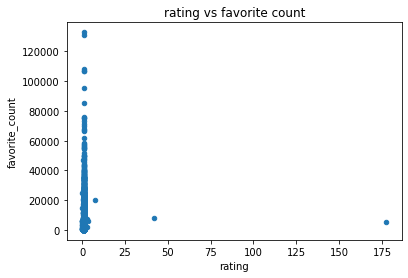

In [52]:
master_df.plot(x='rating', y='favorite_count', kind='scatter', title='rating vs favorite count');

> The chart above is not very informative because only few values are above 2.0. Getting a chart of values less than 2.0 should be better insight.

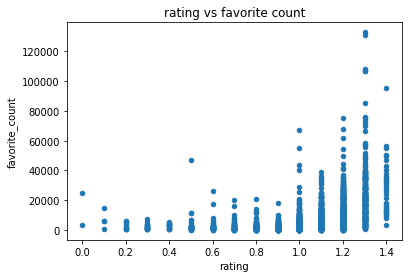

In [53]:
master_df.query('rating < 2.0').plot(x='rating', y='favorite_count', 
                                     kind='scatter', title='rating vs favorite count');

> This chart show the number of ratings less than 2.0 and from the chart we can see that as rating increase the favourite count increase but after rating value of 1.2 the favourite count delined.

### **WHICH DOG STAGE GOT MORE LIKES?**

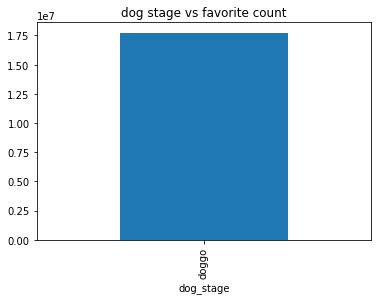

In [54]:
master_df.groupby('dog_stage')['favorite_count'].sum().plot(kind='bar', title='dog stage vs favorite count');

> All dog stages have the same number of favorite count. From the above chart, there is only one dog stage left meaning other dog stages have gone with the cleaning process.

### **DOES INCREASE IN NUMBER OF RETWEET INCREASE THE NUMBER OF LIKES?**

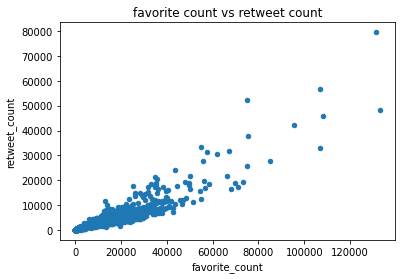

In [55]:
master_df.plot(x='favorite_count', y='retweet_count', kind='scatter', title='favorite count vs retweet count');

> The favorite count increases with the number of retweets